# Lagrange Interpolation with Julia

At the present notebook we perform Lagrange interpolation of $f(x)=\frac{1}{1+25x^{2}}$ using points from a uniform distribution and Chebysev points.The code is written in Julia , and it consists of two function (additional to our $f(x)$).

a)The Chebysev points function where we calculate the points in $[-1,1]$ with the known formula of :
$$\cos(\frac{(2i-1)\pi}{2n})$$

b)The Lagrange polynomial: $$P_n(x) = \sum_{i=0}^{n} L_i(x) f_i$$

where $L_i(x_i) = 1 \quad \text{and} \quad L_i(x_j) = 0 \quad \text{for} \quad i, j = 0, 1, \ldots, n \quad j \neq i$ 

$$L_i(x) = \frac{\prod_{j=0, j \neq i}^{n} (x - x_j)}{\prod_{j=0, j \neq i}^{n} (x_i - x_j)}$$

In [2]:
using Plots

In [15]:
function Chebysev_points(x)
    y=[]
    n=length(x)
    for i in 1:length(x)
        push!(y,cos((2*i-1)*pi/(2*n)))
    end
    return y
end

Chebysev_points (generic function with 1 method)

In [26]:
function Lagrange_Interpolation(x,y,z)
    values=similar(z,size(z,1))
    for k in 1:length(z)
        sum = 0.0
        for i in 1:length(x)
            prod=1.0
            for j in 1:length(y)
                if (i!=j)
                    prod*=(z[k]-x[j])/(x[i]-x[j])
                end
            end
            sum += prod * y[i]
        end
        values[k] = sum
    end 
    return values
end

Lagrange_Interpolation (generic function with 1 method)

In [17]:
function f(x)
    return 1.0 ./ (1.0 .+ 25.0 .* (x.^2))
end


f (generic function with 1 method)

In [37]:
z = range(-1.0, stop=1.0, length=40)

#Let's calculate the real f(x) in 20 uniform points , and also at the Chebysev points
x = range(-1.0, stop=1.0, length=20)
y=f.(x)

chebysev_x=Chebysev_points(x)
chebysev_y=f(chebysev_x)

#Now let's perform interpolation for these points 
uniform_estimation=Lagrange_Interpolation(x,y,z)
chebysev_estimation=Lagrange_Interpolation(chebysev_x,chebysev_y,z)


40-element Vector{Float64}:
 0.037015756581042045
 0.040968611819492864
 0.04902107465673528
 0.05242768704427435
 0.05754791469390428
 0.06870071067259861
 0.0796787878729255
 0.0879794345224815
 0.09927385175528441
 0.11955775754478334
 ⋮
 0.0992738517552845
 0.08797943452248147
 0.07967878787292544
 0.0687007106725985
 0.0575479146939043
 0.052427687044274376
 0.04902107465673524
 0.04096861181949285
 0.037015756581042045

## Visualization 

As we can see below , Chebysev points perform a much better approximation of the function at edges of the interval , than the one we got with the uniform points.

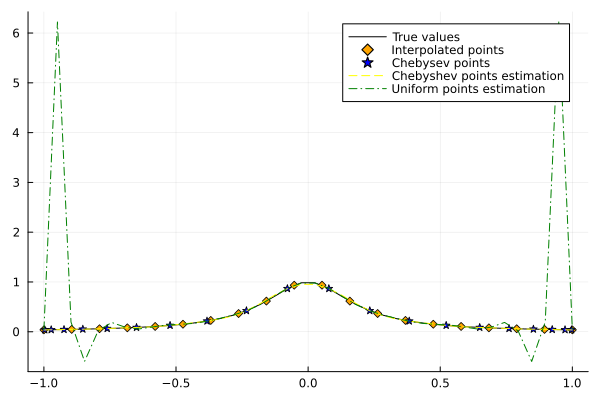

In [38]:
plot(z,f(z),label="True values",color="black")
scatter!(x,y,label="Interpolated points", marker=:diamond, color="orange")
scatter!(chebysev_x,chebysev_y,label="Chebysev points",marker=:star,color="blue")
plot!(z,chebysev_estimation, label="Chebyshev points estimation", color="yellow", linestyle=:dash)
plot!(z,uniform_estimation,label="Uniform points estimation",color="green",linestyle=:dashdot)